In [1]:
import cv2
import glob
import utils
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_images = []
for j in xrange(17):
    image_name = "../data/raw/averages/{}.png".format(j)
    test_images.append(cv2.imread(image_name))
print len(test_images)

17


In [3]:
labels = {
    0: 'FIST-TOP',
    1: 'PALM-TOP',
    2: 'PALM-SIDE',
    3: 'RING',
    4: 'V',
    5: 'FIST-SIDE',
    6: 'THIRD-FINGER',
    7: 'GOAT',
    8: 'SECOND-FINGER',
    9: 'FOURTH-FINGER',
    10: 'DREI',
    11: 'POINTER',
    12: 'GOAT-INV',
    13: 'GUN',
    14: 'PALM-BOTTOM',
    15: 'FIRST-FINGER',
    16: 'FAN'
}
labels_list = [labels[j] for j in xrange(17)]

In [4]:
def get_contour(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary = utils.binarize(gray)
    _, contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    return max(contours, key=cv2.contourArea)

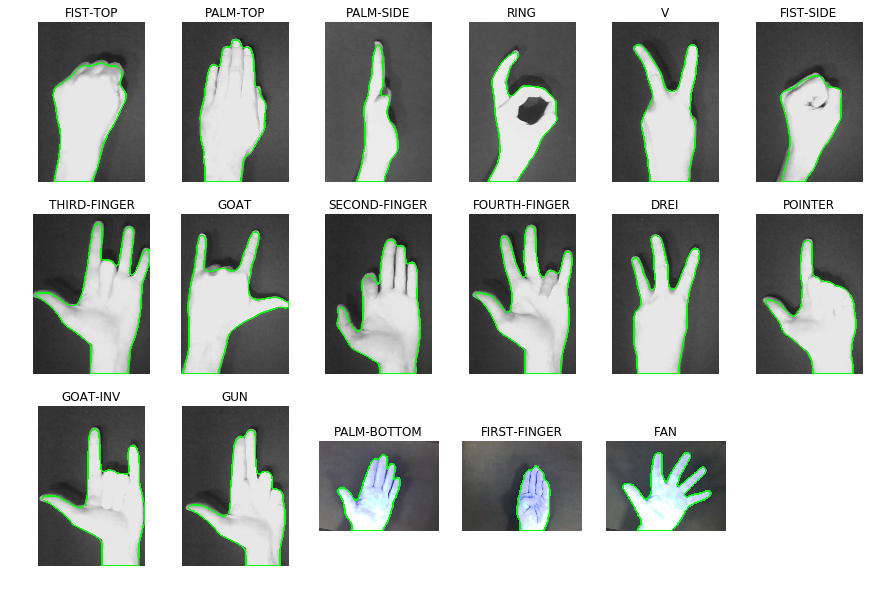

In [5]:
contours = [get_contour(image) for image in test_images]

plt.figure(figsize=(15, 10))
for j in xrange(len(test_images)):
    plt.subplot(3, 6, j+1)
    plt.axis('off')
    cv2.drawContours(test_images[j], contours, j, (0, 255, 0), 4)
    plt.imshow(test_images[j])
    plt.title(labels_list[j])
plt.show()

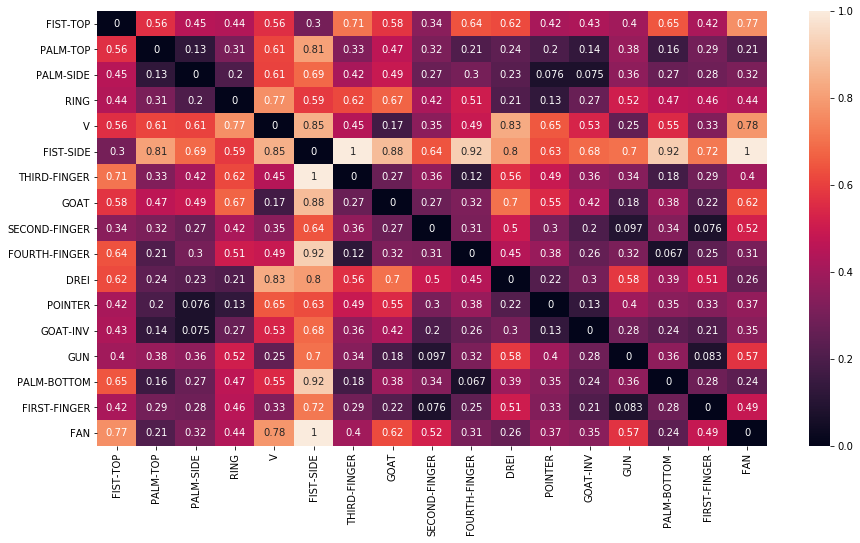

In [6]:
hausdorf_dist = cv2.createHausdorffDistanceExtractor()

hausdorf_mat = np.zeros(shape=(17, 17), dtype=float)
for i in xrange(hausdorf_mat.shape[0]):
    for j in xrange(hausdorf_mat.shape[1]):
        hausdorf_mat[i, j] = hausdorf_dist.computeDistance(contours[i], contours[j])

hausdorf_mat /= hausdorf_mat.max()
        
plt.figure(figsize=(15, 8))
sns.heatmap(hausdorf_mat, annot=True, xticklabels=labels_list, yticklabels=labels_list)

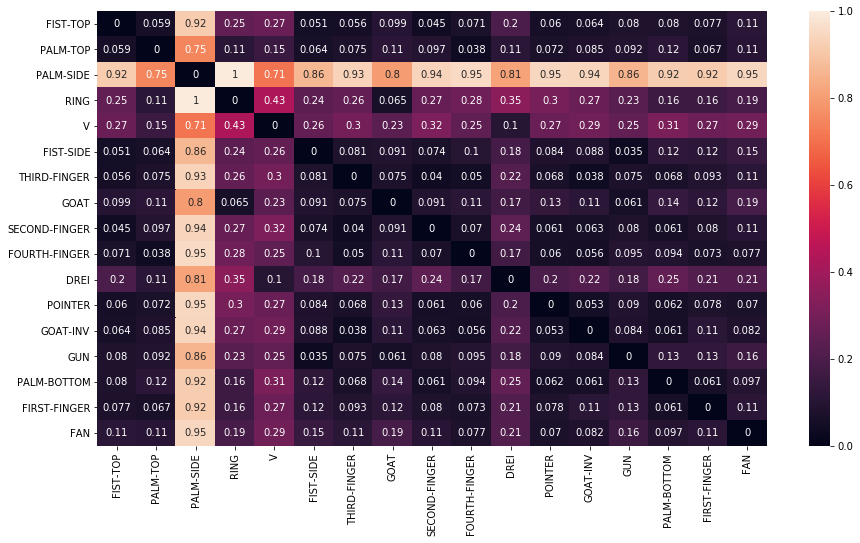

In [7]:
hu_dist = lambda x,y: cv2.matchShapes(x, y, 1, 0.0)

hu_mat = np.zeros(shape=(17, 17), dtype=float)
for i in xrange(hu_mat.shape[0]):
    for j in xrange(hu_mat.shape[1]):
        hu_mat[i, j] = hu_dist(contours[i], contours[j])
        
hu_mat /= hu_mat.max()

plt.figure(figsize=(15, 8))
sns.heatmap(hu_mat, annot=True, xticklabels=labels_list, yticklabels=labels_list)

In [9]:
corr = np.corrcoef(hausdorf_mat.ravel(), hu_mat.ravel())
print corr

[[ 1.         -0.01347924]
 [-0.01347924  1.        ]]
